In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

c:\Users\ernes\anaconda3\envs\easyOCR\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] No se encontró el proceso especificado'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


area=  2181.5
1.736842105263158
si
[541.0, 1732.5, 881.5, 507.0, 710.0, 1, 2181.5]
1


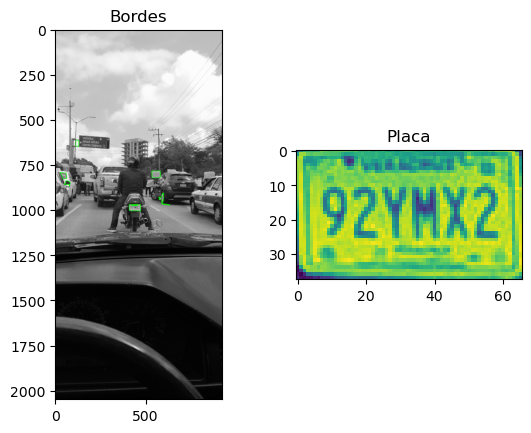

In [92]:
img = cv2.imread('C:\\Users\\ernes\\Documents\\Actividades\\Practicas\\Imagenes carros\\carro20.jpeg',0)
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gris = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gris = cv2.blur(gris,(3,3))

canny = cv2.Canny(gris,150,200)
canny = cv2.dilate(canny, None, iterations=1)

cnts,_ = cv2.findContours(canny.copy(), cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

placaArea = [1]
placaArea2 = 0
for c in cnts:
    area = cv2.contourArea(c)
    x,y,w,h = cv2.boundingRect(c)
    epsilon = 0.09*cv2.arcLength(c,True)
    approx = cv2.approxPolyDP(c,epsilon,True)
    if len(approx)==4 and 9000>area > 500:
        placaArea.insert(0,area)
        cv2.drawContours(image,[c],0,(0,255,0),2)
        proporcion =float(w)/h
        if 2.5 >proporcion >= 1.3:
            print('area= ', area)
            print(proporcion)
            if placaArea2 != placaArea[-1]:
                placa = img[y:y+h,x:x+w]
                print("si")
            placaArea2 = placaArea[-1]
            placaArea = sorted(placaArea)
            
            


print(placaArea)
print(placaArea2)
plt.subplot(1, 2, 1)
plt.title("Bordes")
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title("Placa")
plt.imshow(placa)

plt.show()

In [93]:
reader = easyocr.Reader(['en'])
result = reader.readtext(placa, paragraph = True)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[[[[2, 6], [64, 6], [64, 32], [2, 32]], '(92ynXZ']]

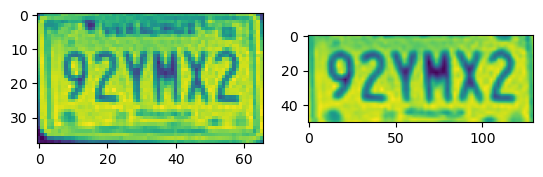

In [94]:
pts1 = np.float32([result[0][0][0],result[0][0][1],result[0][0][3],result[0][0][2]])
#locationAR = np.float32(result[0][0])
pts2 = np.float32([[0,0],[130,0],[0,50],[130,50]])


plt.subplot(1, 2, 1)
plt.imshow(placa)
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(placa,M,(130,50))
plt.subplot(1, 2, 2)
plt.imshow(dst)